In [50]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
    ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(vectorizer.vocabulary_)


print(type(vectorizer))


print(X.toarray()) 


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}
<class 'sklearn.feature_extraction.text.CountVectorizer'>
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [51]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
    ]

vocabulary = set()
for doc in corpus:
    vocabulary.update(doc.split())
    
vocabulary = list(vocabulary)
#print (vocabulary)
word_index = {w:idx for idx, w in enumerate(vocabulary)}
print (word_index)

{'the': 0, 'third': 1, 'second': 2, 'is': 3, 'This': 4, 'Is': 5, 'And': 6, 'document': 7, 'this': 8, 'document?': 9, 'one.': 10, 'document.': 11, 'first': 12}


In [5]:
import sklearn
# Import all of the scikit learn stuff

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd

example = ["Machine learning is super fun",
"Python is super, super cool",
"Statistics is cool, too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
"Football is great to watch"]
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names
()).head(10)

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
"Python is super, super cool",1,0,0,0,0,0,0,0,1,0,0,2,0
"Statistics is cool, too",1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [6]:
# Get words that correspond to each column
vectorizer.get_feature_names()

['cool',
 'data',
 'football',
 'fun',
 'great',
 'learning',
 'like',
 'machine',
 'python',
 'science',
 'statistics',
 'super',
 'watch']

In [52]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [53]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [54]:
news_df = pd.DataFrame({'document':documents})

In [55]:
news_df.head()

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


In [56]:
news_df.iloc[0]

document    Well i'm not sure about the story nad it did s...
Name: 0, dtype: object

In [57]:
# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [58]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [62]:
# document term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, #ignore terms that appear in more than 50% of the documents
smooth_idf=True)#If a word from vocabulary was never seen in the train data, but occures in the test, smooth_idf allows it to be successfully processed.

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix


(11314, 1000)

In [72]:
print(vectorizer.get_feature_names()[0:15])

['ability', 'able', 'accept', 'access', 'according', 'account', 'action', 'actions', 'actual', 'actually', 'added', 'addition', 'additional', 'address', 'administration']


In [85]:
import pandas as pd
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=X[0]


# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
media,0.667187
israeli,0.347507
soldiers,0.186058
described,0.172328
letter,0.169655
realize,0.167388
reports,0.165086
report,0.162767
received,0.160766
jews,0.160445


In [35]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [95]:
from scipy.sparse.linalg import svds

U, S, V = svds(X)
print(U.shape, S.shape, V.shape)


(11314, 6) (6,) (6, 1000)


In [97]:
print (S)

[ 7.31738569  7.62272699  7.91123934  8.2061179   9.94205981 16.67063607]


In [98]:
u, s, vt = svds(X, k=20)
print (s)

[ 5.90237972  5.94626197  5.98740576  6.08149194  6.18079939  6.22550494
  6.37002011  6.48971321  6.53236743  6.62603555  6.73282362  6.86782698
  6.91125279  7.14730728  7.31738569  7.62272699  7.91123934  8.2061179
  9.94205981 16.67063607]


In [18]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("\n" + "Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0], end =" ")
        


Topic 0: 
like know people think good time thanks 
Topic 1: 
thanks windows card drive mail file advance 
Topic 2: 
game team year games season players good 
Topic 3: 
drive scsi disk hard card drives problem 
Topic 4: 
windows file window files program using problem 
Topic 5: 
government chip mail space information encryption data 
Topic 6: 
like bike know chip sounds looks look 
Topic 7: 
card sale video offer monitor price jesus 
Topic 8: 
know card chip video government people clipper 
Topic 9: 
good know time bike jesus problem work 
Topic 10: 
think chip good thanks clipper need encryption 
Topic 11: 
thanks right problem good bike time window 
Topic 12: 
good people windows know file sale files 
Topic 13: 
space think know nasa problem year israel 
Topic 14: 
space good card people time nasa thanks 
Topic 15: 
people problem window time game want bike 
Topic 16: 
time bike right windows file need really 
Topic 17: 
time problem file think israel long mail 
Topic 18: 
file need 

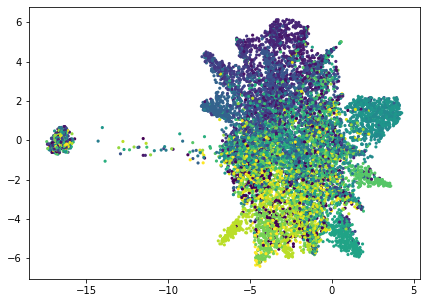

In [25]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()